## Initial data transformation and processing

In [1]:
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/Users/mati/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
data_array = sio.loadmat('data/DATASET.mat')['DATASET']

Original dataset has all variables as imaginary numbers, for most of them the imaginary part is zero. But for FFT variables imaginary part is non-zero.

We'll split variables with imaginary part in real and imaginary as separate variables. Then, all variables will be represented as floats.

In [3]:
# Get only real part
data_float = data_array.copy().real.astype(float)
# Get imaginary part
imaginary_L_FFT = data_array.imag[:, 597:797]
imaginary_R_FFT = data_array.imag[:, 797:997]
# Array with all variables as float (includding imaginary part as a separate variable)
all_float_array = np.hstack((data_float[:, :997], imaginary_L_FFT, imaginary_R_FFT, data_float[:, 997:]))

In [4]:
# Imaginary components are now separated
print 'original dataset shape:', data_array.shape
print 'all floats dataset shape:', all_float_array.shape

original dataset shape: (65600, 1039)
all floats dataset shape: (65600, 1439)


Now we will include feature names:

In [5]:
column_names = []
for i in range(200):
    column_names.append('L_HRIR_{:d}'.format(i))
for i in range(200):
    column_names.append('R_HRIR_{:d}'.format(i))
for i in range(98):
    column_names.append('L_HRTF_{:d}'.format(i))
for i in range(98):
    column_names.append('R_HRTF_{:d}'.format(i))
for i in range(200):
    column_names.append('L_FFT_real_{:d}'.format(i))
for i in range(200):
    column_names.append('R_HRIR_real_{:d}'.format(i))
for i in range(200):
    column_names.append('L_FFT_imag_{:d}'.format(i))
for i in range(200):
    column_names.append('R_HRIR_imag_{:d}'.format(i))
# Interaction Parameters
# Time-arrival Difference
column_names.append('ITD')
# Intensity Difference
column_names.append('IID')
# Spectral Difference
column_names.append('DS')
# Head Parameters
column_names.append('head_width')
column_names.append('head_height')
column_names.append('head_depth')
column_names.append('pinna_offset_down')
column_names.append('pinna_offset_back')
column_names.append('neck_width')
column_names.append('neck_height')
column_names.append('neck_depth')
column_names.append('torso_top_width')
column_names.append('torso_top_heigth')
column_names.append('torso_top_depth')
column_names.append('shoulder_width')
column_names.append('head_offset_forward')
column_names.append('height')
column_names.append('seated_height')
column_names.append('head_circumference ')
column_names.append('shoulder_circumference')

# Ear Parameters
column_names.append('L_cavum_concha_heigth')
column_names.append('L_cymba_concha_heigth')
column_names.append('L_cavum_concha_width')
column_names.append('L_fossa_height')
column_names.append('L_pinna_height')
column_names.append('L_pinna_width')
column_names.append('L_intertragal_incisure_width')
column_names.append('L_cavum_concha_depth')
column_names.append('R_cavum_concha_heigth')
column_names.append('R_cymba_concha_heigth')
column_names.append('R_cavum_concha_width')
column_names.append('R_fossa_height')
column_names.append('R_pinna_height')
column_names.append('R_pinna_width')
column_names.append('R_intertragaR_incisure_width')
column_names.append('R_cavum_concha_depth')

# Pinnae Rotation Parameters
column_names.append('L_pinna_rotation_angle')
column_names.append('L_pinna_flare_angle')
column_names.append('R_pinna_rotation_angle')
column_names.append('R_pinna_flare_angle')

# Target
column_names.append('azimuth')
column_names.append('elevation')

# Subject Id
column_names.append('subject_id')

In [6]:
len(column_names)

1439

In [7]:
df = pd.DataFrame(all_float_array, columns=column_names)

In [8]:
# col_ix Dictionary can be used to get the index of any feature
col_ix = {}
for i, col in enumerate(df.columns):
    col_ix[col] = i

In [9]:
# Number of unique azimuth, elevation and subject_id values
print 'azimuth:', df.azimuth.nunique()
print 'elevation:', df.elevation.nunique()
print 'subject_id:', df.subject_id.nunique()

azimuth: 60
elevation: 32
subject_id: 95


Full dataset contains data from two original datasets.

For the moment we will work with the first dataset only.

In [10]:
ds_1 = df.ix[:56249].copy()
ds_1.shape

(56250, 1439)

In [11]:
# TOTAL Unique Subjects for dataset 1 = 45
ds_1.loc[:, ('subject_id')] = ds_1['subject_id'].astype(int)
ds_1.subject_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

## Inter-subject variation for same azimuth and elevation angles

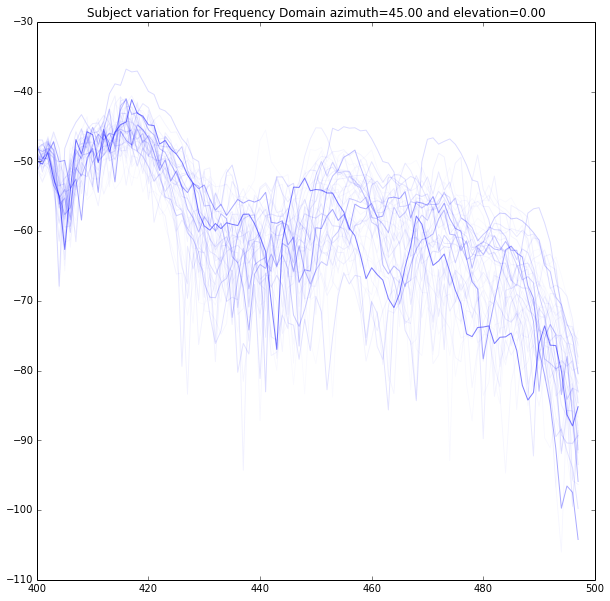

In [51]:
plt.figure(figsize=(10, 10))
#azimuth = np.random.randint(-180, 175)
#elevation = np.random.randint(-50, 90)
azimuth, elevation = 45.0, 0.0 
location = ds_1[(ds_1.azimuth == azimuth) & (ds_1.elevation == elevation)]
location2 = ds_1[(ds_1.azimuth == 0.0) & (ds_1.elevation == 0.0)]
location3 = ds_1[(ds_1.azimuth == -45.0) & (ds_1.elevation == elevation)]
range_ = range(400, 498)
l_hrtf = location.iloc[:,range_]
r_hrtf = location.iloc[:, range_]
j = 1
for i in range(1, 45):
    first = l_hrtf[location.subject_id == i].iloc[0]
    plt.plot(range_, first, c='b', alpha=1.0/(j+1))
    #plt.plot(range(98), r_hrir.iloc[i], c='r', alpha=1.0/(j+1))
    j += 1
#plt.legend(loc='upper right')
plt.title('Subject variation for Frequency Domain azimuth={:.2f} and elevation={:.2f}'.format(azimuth, elevation))
plt.show()

In [99]:
# Analayzing non-HRTF features (extracted features)
# Some of them seem to be missing
ds_1.ix[:, 1399:].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
head_width,46250,14.428826,0.905161,12.646597,13.903307,14.443268,14.892092,16.203902
head_height,46250,21.377795,1.161957,18.865526,20.665188,21.311794,22.090244,23.842658
head_depth,46250,19.900724,1.312059,16.660570,19.275830,19.915320,20.870571,23.064239
pinna_offset_down,46250,3.006494,0.586056,1.408322,2.446867,3.220209,3.469709,3.772236
pinna_offset_back,46250,0.389666,0.590552,-1.170696,0.167971,0.393765,0.785692,1.899457
neck_width,46250,11.518612,0.997720,9.408768,11.020129,11.549176,12.212968,14.042607
neck_height,46250,6.177656,1.972471,1.905978,4.982187,6.340924,7.461400,10.600237
neck_depth,46250,10.477648,1.134602,7.837414,9.936521,10.372081,11.325472,12.534256
torso_top_width,46250,30.953683,2.606181,25.202642,29.566625,31.213773,32.422859,36.839476
torso_top_heigth,46250,13.429684,1.939632,9.412423,12.236193,13.005980,14.494436,17.560892


/Library/Python/2.7/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


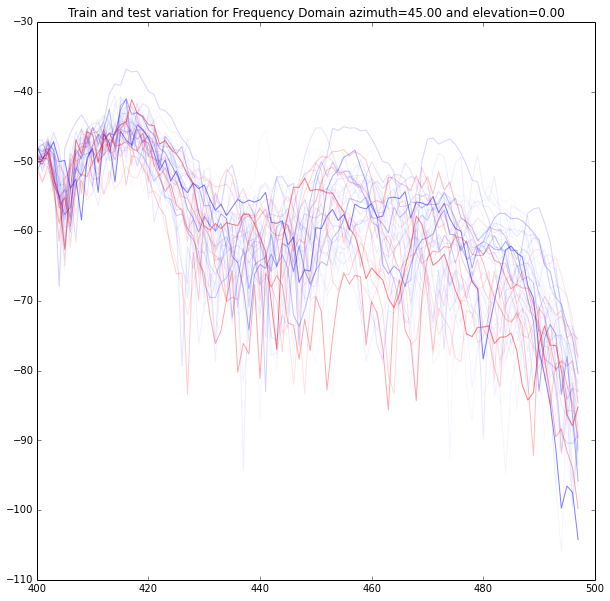

In [65]:
plt.figure(figsize=(10, 10))
#azimuth = np.random.randint(-180, 175)
#elevation = np.random.randint(-50, 90)
azimuth, elevation = 45.0, 0.0
range_ = range(400, 498)
train_location = train[(ds_1.azimuth == azimuth) & (ds_1.elevation == elevation)]
test_location = test[(ds_1.azimuth == azimuth) & (ds_1.elevation == elevation)]
l_hrtf = train_location.iloc[:, range_]
l_hrtf_test = test_location.iloc[:, range_]
j = 1
for i in train.subject_id.unique():
    subj_train = l_hrtf[train.subject_id == i].iloc[0]
    plt.plot(range_, subj_train, c='b', alpha=1.0/(j+1))
    j += 1
j = 1
for i in test.subject_id.unique():
    subj_test = l_hrtf_test[test.subject_id == i].iloc[0]
    plt.plot(range_, subj_test, c='r', alpha=1.0/(j+1))
    j += 1
    
plt.legend(loc='upper right')
plt.title('Train and test variation for Frequency Domain azimuth={:.2f} and elevation={:.2f}'.format(azimuth, elevation))
plt.show()

Frequency series for subjects in Training and Test Sets

## Baseline Regression Tree model
### Dataset split
- training: 75%
- validation: 10%
- test: 15%

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.metrics import mean_absolute_error
from math import ceil

In [116]:
def split_dataset(n, training_perc=0.75, val_perc=0.1):
    train_size = int(ceil(n*training_perc))
    val_size = int(ceil(n*val_perc))
    shuffled_ix = np.random.choice(range(1, n+1), n, replace=False)
    return shuffled_ix[:train_size], shuffled_ix[train_size:train_size + val_size], shuffled_ix[train_size + val_size:]

In [34]:
# Fit regression model
# Only use this columns for the moment
cols_range = range(0, 1399) + range(-3, 0, 1)
ds_1 = ds_1.ix[:, cols_range]
n = 45
train_size = int(ceil(n*0.8))
#train_ix, val_ix, test_ix = split_dataset(n)
#train_ix.sort()
#val_ix.sort()
#test_ix.sort()
#print 'chosen training subjects:', train_ix
#print 'chosen validation subjects:', val_ix
#print 'chosen test subjects:', test_ix

From now on, chosen users will be used for each dataset (trainig, validation and testing)

In [35]:
train_ix = [2, 3, 4, 5, 6, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 22, 23,
            25, 26, 27, 28, 31, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44]
val_ix = [7, 24, 29, 30, 38]
test_ix = [1, 12, 20, 21, 32, 45]

train = ds_1[ds_1.subject_id.isin(train_ix)]
val = ds_1[ds_1.subject_id.isin(val_ix)]
test = ds_1[ds_1.subject_id.isin(test_ix)]

### Building model for Elevation

In [19]:
X_train, y_train = train.ix[:, :-3], train.ix[:, -2:-1]
X_test, y_test = test.ix[:, :-3], test.ix[:, -2:-1]

In [36]:
print X_train.shape
print X_test.shape

(42500, 1399)
(7500, 1399)


In [46]:
# Regression Tree Baseline Model
# command: dot -Tpng tree4.dot -o tree4.png
depth = 25
regr = DecisionTreeRegressor(max_depth=depth)
regr.fit(X_train, y_train)
with open('tree' + str(depth) + '.dot', 'w') as dotfile:
    export_graphviz(
        regr,
        dotfile,
        feature_names=X_train.columns)

# Predict
y_pred = regr.predict(X_test)
loss = mean_absolute_error(y_test, y_pred)

print loss

16.0879190673


In [45]:
pd.Series(y_pred).nunique()

32

In [43]:
new_df = pd.concat([y_test, pd.Series(y_pred, index=y_test.index), test.ix[:, -3:]], axis=1)
new_df.to_csv('results.csv')

In [32]:
# Prediction Tree Baseline Model
# command: dot -Tpng tree4.dot -o tree4.png
depth=3
c_tree = DecisionTreeClassifier(max_depth=depth)
c_tree.fit(X_train, y_train)

with open('class_tree' + str(depth) + '.dot', 'w') as dotfile:
    export_graphviz(
        regr,
        dotfile,
        feature_names=X_train.columns)

# Predict
y_pred = c_tree.predict(X_test)
loss = mean_absolute_error(y_test, y_pred)

print loss

ValueError: Unknown label type: array([[-45.   ],
       [-45.   ],
       [-45.   ],
       ..., 
       [-50.625],
       [-50.625],
       [-50.625]])

In [157]:
from sklearn.neighbors import KNeighborsRegressor

In [160]:
knn_regr = KNeighborsRegressor(n_neighbors=5, weights='distance')
knn_regr.fit(X_train, y_train)
# Predict
y_pred = knn_regr.predict(X_test)
loss = mean_absolute_error(y_test, y_pred)

print loss

19.1014454668
